<a href="https://colab.research.google.com/github/schneider128k/machine_learning_course/blob/master/linear_regression_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook for solving linear regression using the batch/mini-batch/stochastic gradient descent

## Imports

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Generate random data

In [0]:
# generate m random pairs (x, y)

m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.rand(m, 1)

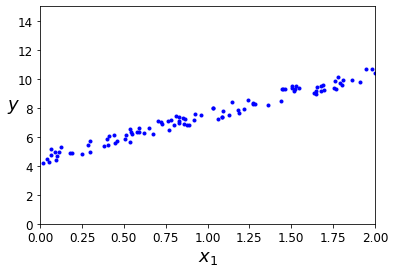

In [0]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [0]:
print(X.shape)

(100, 1)


In [0]:
# show the first 5 rows
print(X[:5, :])

[[0.96309868]
 [1.27088729]
 [0.1814434 ]
 [0.0652359 ]
 [0.11540586]]


## Combine bias $b=w_0$ and weight $w_1$

Linear regression predicts $\hat{y}=b + w_1 x_1$. It will be convenient to rewrite this as a dot product.  Define $w=(w_0, w_1)$ and $x=(1, x_1)$.  Then, we have $\hat{y}=w \boldsymbol{\cdot} x$.

In [0]:
# add x0 = 1 
X_b = np.column_stack([np.ones((m, 1)), X])

In [0]:
print(X_b.shape)

(100, 2)


In [0]:
# show the first 5 rows
print(X_b[:5, :])

[[1.         0.96309868]
 [1.         1.27088729]
 [1.         0.1814434 ]
 [1.         0.0652359 ]
 [1.         0.11540586]]


In [0]:
# create array with x1=0 and x1=2
X_new = np.array([[0], [2]])
# add x0 = 1 to each instance
X_new_b = np.column_stack([np.ones((2, 1)), X_new])

In [0]:
print(X_new_b)

[[1. 0.]
 [1. 2.]]


## Linear regression using batch gradient descent 
All training examples are used to compute the gradient.

In [0]:
# number of epochs
epochs = 20
# learning rate
lr = 0.01
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(2, 1) 

In [0]:
# sanity check (I will use this to explain how the vectorized code works)
print(initial_weight.shape)
print(y.shape)
print((X_b.dot(initial_weight)).shape)
print((X_b.T.dot(X_b.dot(initial_weight))).shape)

(2, 1)
(100, 1)
(100, 1)
(2, 1)


In [0]:
weight = initial_weight

for epoch in range(epochs):
    gradient = 1/m * X_b.T.dot(X_b.dot(weight) - y)
    weight = weight - lr * gradient

In [0]:
y_predict = X_new_b.dot(weight)
y_predict

array([[1.6589593],
       [3.9538715]])

In [0]:
def plot_gradient_descent(weight, lr, weight_path=None):
    # plot training data
    plt.plot(X, y, "b.")
    # plot initial prediction
    y_predict = X_new_b.dot(weight)
    plt.plot(X_new, y_predict, "r--")
    
    if weight_path is not None:
      weight_path.append(weight)

    for epoch in range(epochs):
        gradient = 1 / m * X_b.T.dot(X_b.dot(weight) - y)
        weight = weight - lr * gradient
        if weight_path is not None:
            weight_path.append(weight)
        # plot prediction after weight update
        y_predict = X_new_b.dot(weight)
        plt.plot(X_new, y_predict, "b-")
        
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title("lr {}".format(lr), fontsize=16)

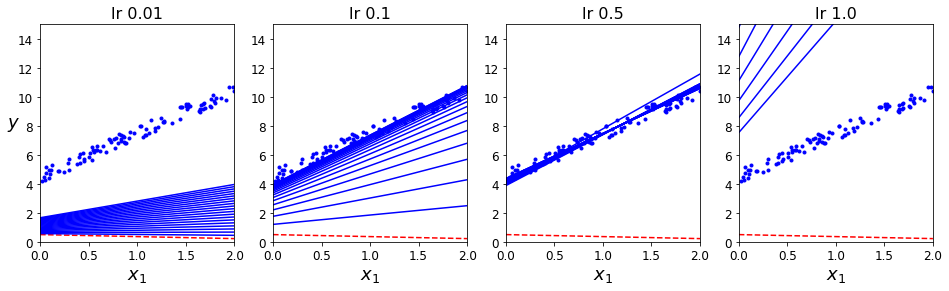

In [0]:
weight_path_bgd = []

plt.figure(figsize=(16, 4))
plt.subplot(141); plt.ylabel("$y$", rotation=0, fontsize=18); plot_gradient_descent(initial_weight, 0.01)
plt.subplot(142); plot_gradient_descent(initial_weight, 0.1, weight_path_bgd)
plt.subplot(143); plot_gradient_descent(initial_weight, 0.5)
plt.subplot(144); plot_gradient_descent(initial_weight, 1.0)
plt.show()

In [0]:
weight_path_bgd[-1]

array([[3.94721736],
       [3.41555631]])

# Linear regression using stochastic gradient descent
A single random training examples is used to compute the gradient.

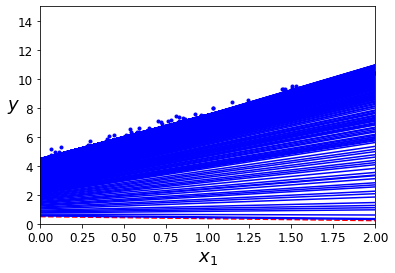

In [0]:
weight = initial_weight
weight_path_sgd = []

# plot training data
plt.plot(X, y, "b.")
# plot initial prediction
y_predict = X_new_b.dot(weight)                    
plt.plot(X_new, y_predict, "r--")        

weight_path_sgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    for i in range(m):           
        xi = X_b_shuffled[i:i+1]
        yi = y_shuffled[i:i+1]
        gradient = xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_sgd.append(weight)
        
        y_predict = X_new_b.dot(weight)                    
        plt.plot(X_new, y_predict, "b-")        
    
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                                              
plt.show()                 

In [0]:
weight_path_sgd[-1]

array([[4.47724563],
       [2.99319682]])

# Linear regression using mini-batch gradient descent
A few training examples are selected to compute the gradient.

In [0]:
weight = initial_weight
weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

In [0]:
weight_path_mgd[-1]

array([[4.17760584],
       [3.27504679]])

In [0]:
weight_path_bgd = np.array(weight_path_bgd)
weight_path_sgd = np.array(weight_path_sgd)
weight_path_mgd = np.array(weight_path_mgd)

### Compare the three types

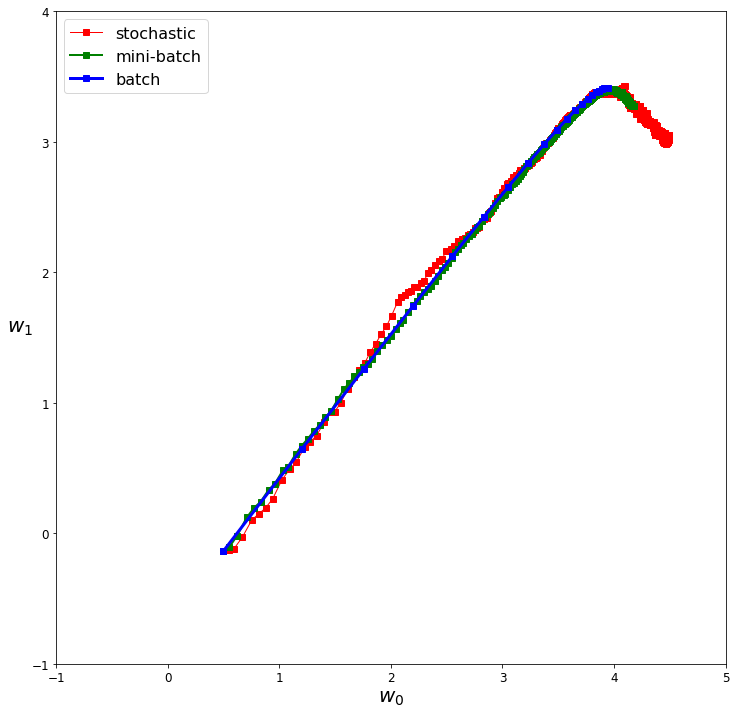

In [0]:
plt.figure(figsize=(12,12))
plt.plot(weight_path_sgd[:, 0], weight_path_sgd[:, 1], "r-s", linewidth=1, label="stochastic")
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-s", linewidth=2, label="mini-batch")
plt.plot(weight_path_bgd[:, 0], weight_path_bgd[:, 1], "b-s", linewidth=3, label="batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$w_0$", fontsize=20)
plt.ylabel(r"$w_1$   ", fontsize=20, rotation=0)
plt.axis([-1, 5, -1, 4])
plt.show()

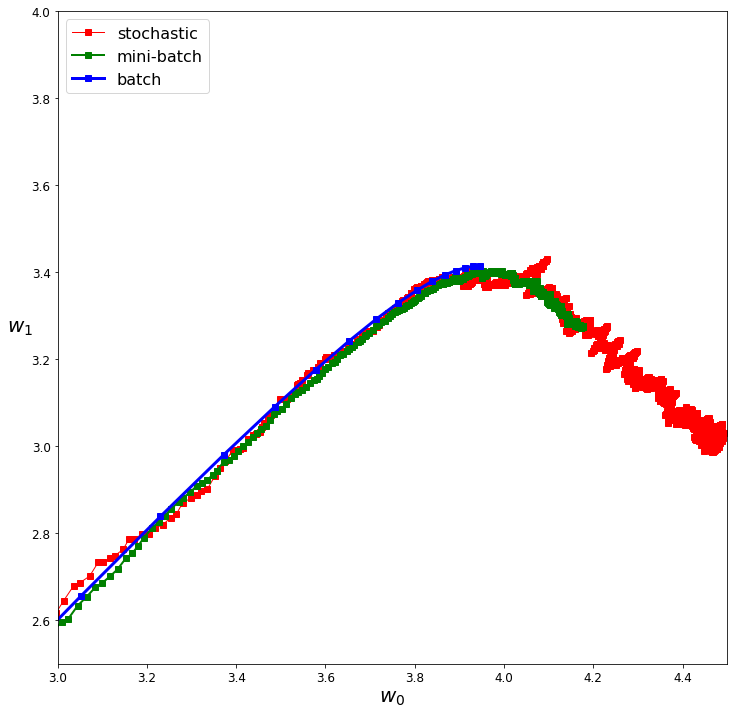

In [0]:
plt.figure(figsize=(12,12))
plt.plot(weight_path_sgd[:, 0], weight_path_sgd[:, 1], "r-s", linewidth=1, label="stochastic")
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-s", linewidth=2, label="mini-batch")
plt.plot(weight_path_bgd[:, 0], weight_path_bgd[:, 1], "b-s", linewidth=3, label="batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$w_0$", fontsize=20)
plt.ylabel(r"$w_1$   ", fontsize=20, rotation=0)
plt.axis([3, 4.5, 2.5, 4])
plt.show()